In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("wine_train.csv")
data.describe()

,wine_ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,3249.257313,7.235364,0.340110,0.318155,5.367572,0.056112,30.364416,115.502309,0.994700,3.219477,0.533006,10.496162,0.249835,5.824060
std,1882.272944,1.319966,0.166643,0.142942,4.748314,0.035236,17.868751,56.989343,0.003015,0.163511,0.150728,1.179564,0.432965,0.876346
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987130,2.740000,0.220000,8.000000,0.000000,3.000000
25%,1618.500000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,5.000000
50%,3227.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,6.000000
75%,4896.500000,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,0.000000,6.000000
max,6495.000000,15.600000,1.580000,1.000000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,1.000000,9.000000


In [6]:
(data.notna()==False).sum()


wine_ID                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
target                  0
dtype: int64

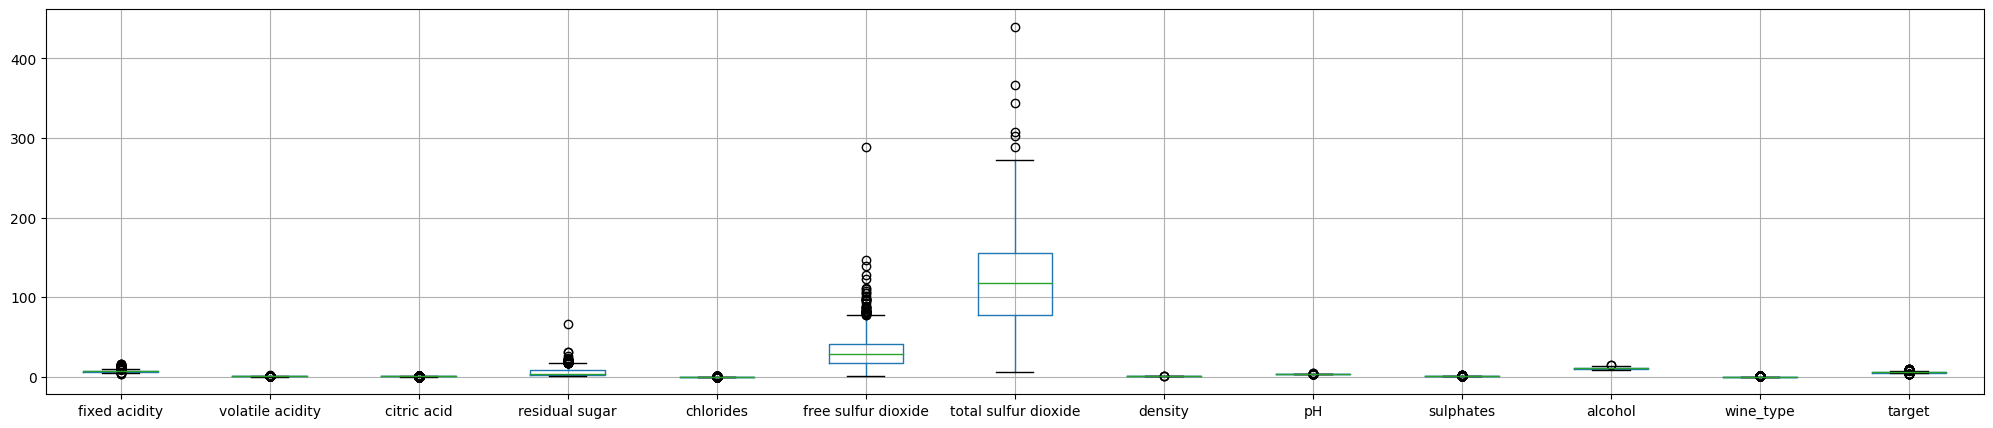

In [14]:
data.iloc[:,1:].boxplot(figsize= (25,5))
plt.show()

In [56]:
X = data.iloc[:,1:-1]
y = data[['target']]


(4547, 1)


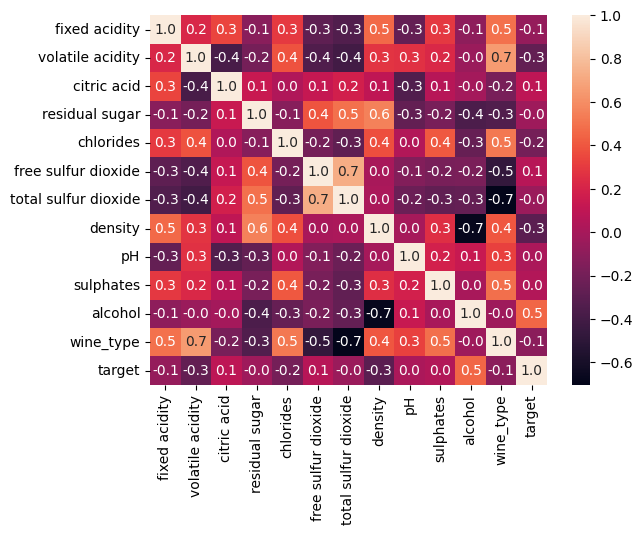

In [23]:
sns.heatmap(data.iloc[:,1:].corr(), annot = True, fmt = ".1f")
plt.show()

Il y a plusieurs covaribales qui sont décorrélées de la variable cible : 
- residual sugar
- sulphates
- ph
- total sulfur dioxide

Il n'y a pas de corrélation linéaire entre ces variables là et la variable cible.

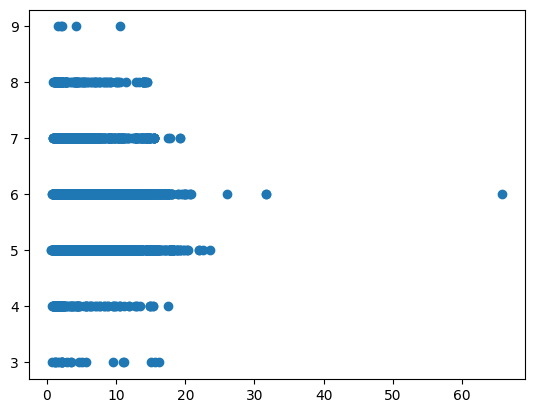

In [26]:
plt.scatter(data['residual sugar'],data['target'])
plt.show()

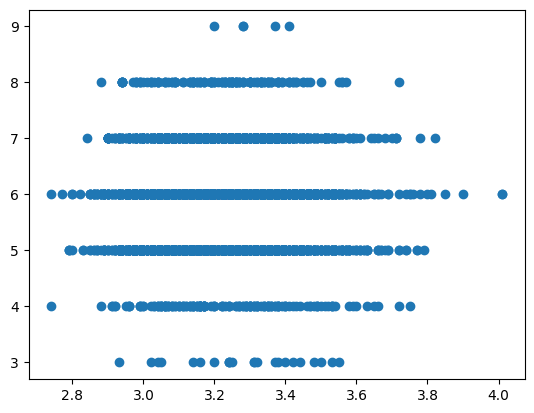

In [28]:
plt.scatter(data['pH'],data['target'])
plt.show()

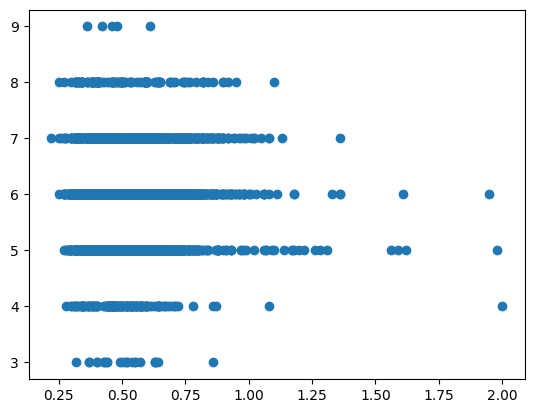

In [29]:
plt.scatter(data['sulphates'],data['target'])
plt.show()

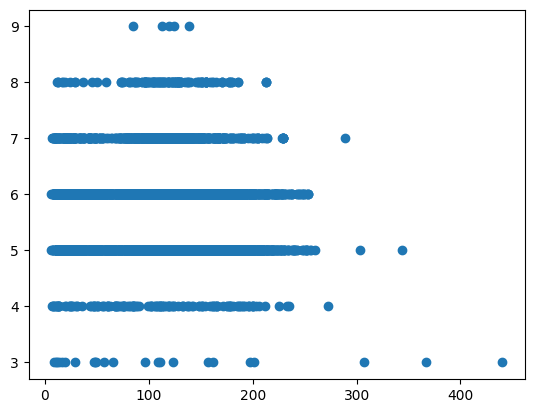

In [31]:
plt.scatter(data['total sulfur dioxide'],data['target'])
plt.show()

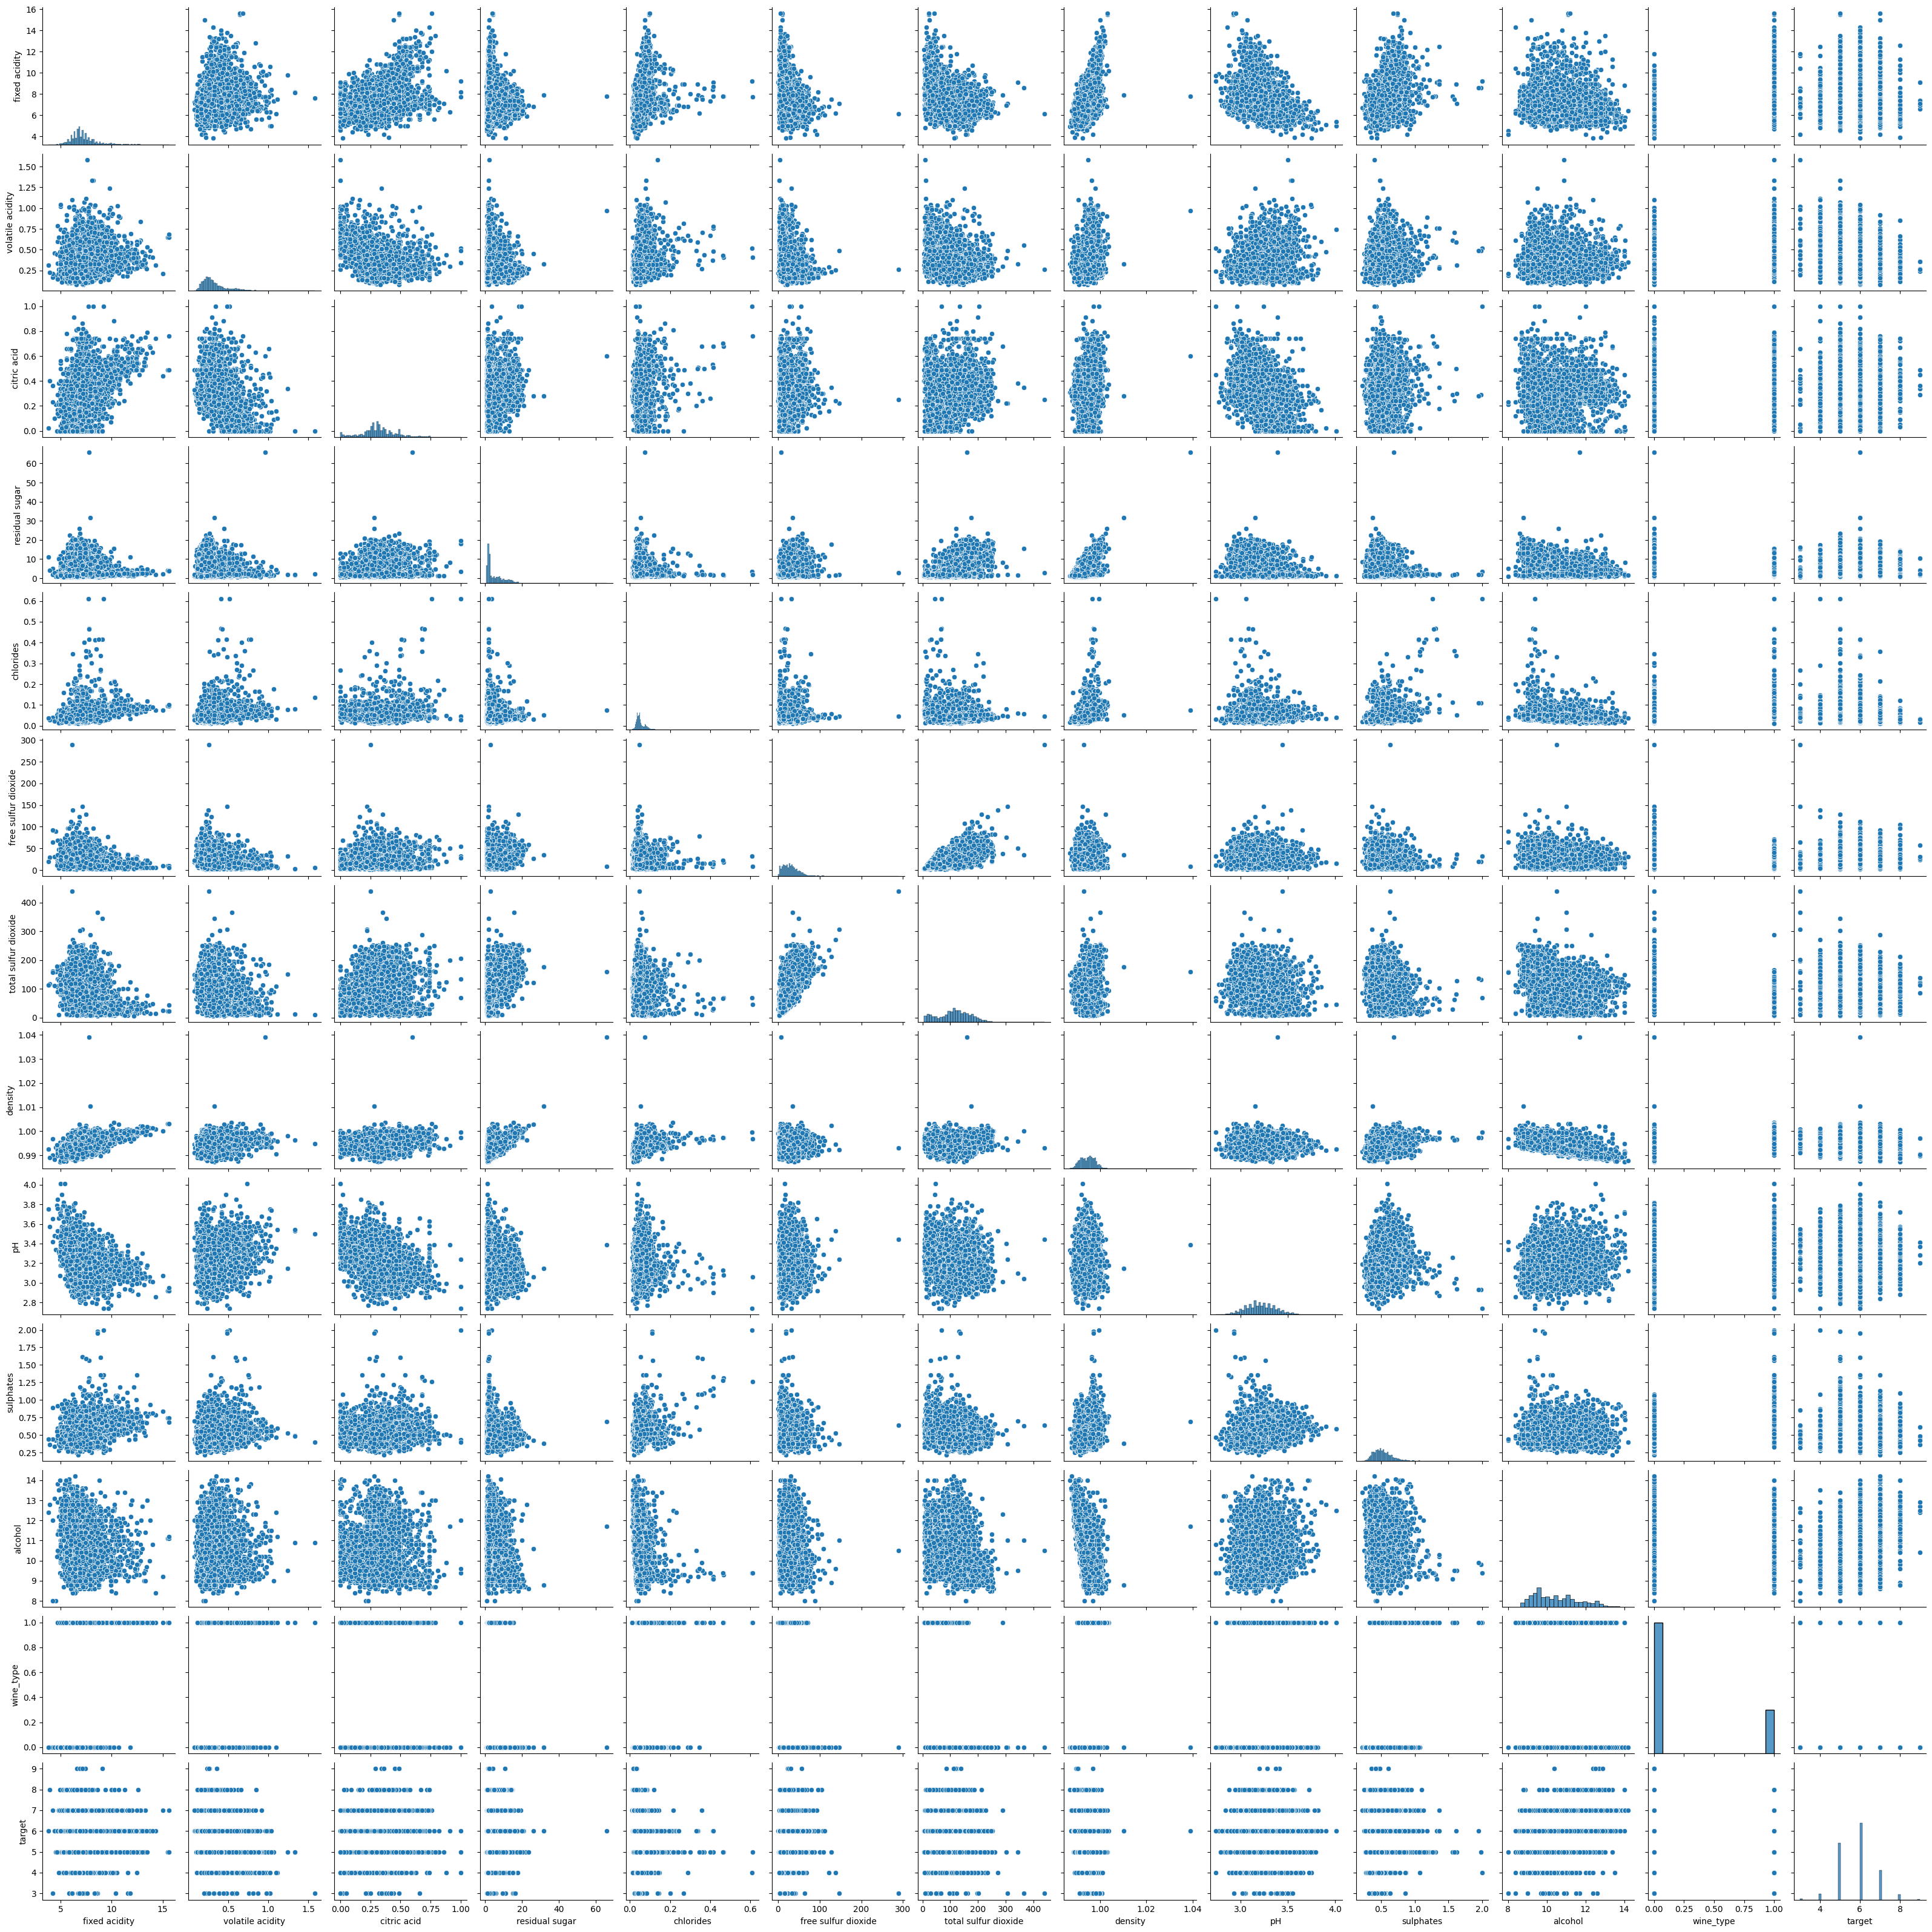

In [35]:
sns.pairplot(data.iloc[:,1:], diag_kind='hist')
plt.show()

In [36]:
#On choisit d'utiliser StandardScaler d'abord
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.decomposition import PCA
n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled[:,0:-1])

explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)

Variance expliquée par chaque composante : [0.27468488 0.22675886 0.14355901]


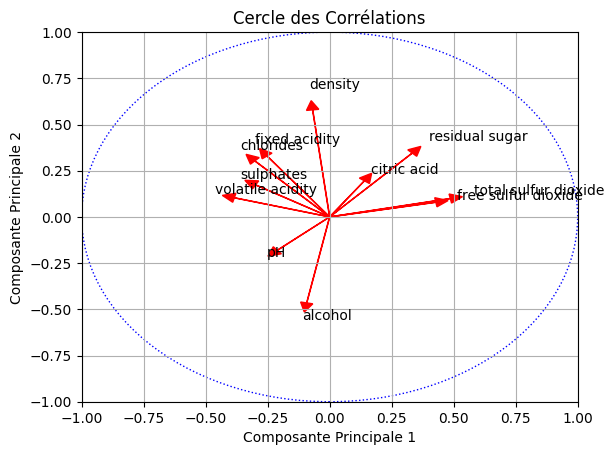

In [44]:
# Obtenir les composantes principales et les vecteurs propres (loadings)
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Créer un cercle des corrélations
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='dotted')
ax.add_artist(circle)

for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='red', ec='red')
    #plt.text(x * 1.2, y * 1.2, f'Variable {i+1}', color='black')
    plt.text(x * 1.2, y * 1.2, data.columns[i+1], color='black')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle des Corrélations')
plt.grid(True)
plt.show()

Difficile de dégager une tendance ou un lien entre les différentes variables du dataset.

In [58]:
from sklearn.model_selection import train_test_split

# Supposons que X soit votre ensemble de données et y soit vos étiquettes cibles (si elles existent)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression

# Créez une instance du modèle de régression logistique
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [73]:
def winetype(data): 
 wine_type = data[["wine_type"]].to_numpy()
 index_0 = np.where(wine_type==0)[0]
 index_1 = np.where(wine_type==1)[0]
 return index_0,index_1

def treatment(data): 
 X = data[data.columns[1:-1]]
 y = data[["target"]]
 return X,y


In [81]:
idx0, idx1 = winetype(data)

data0 = data.iloc[idx0,:]
data1 = data.iloc[idx1,:]

X0,y0 = treatment(data0)
X1,y1 = treatment(data1)

del X0['wine_type']
del X1['wine_type']

In [82]:
scaler = StandardScaler()
X0_scaled = scaler.fit_transform(X0)
n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X0_scaled[:,0:-1])

explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)

Variance expliquée par chaque composante : [0.26916013 0.16074597 0.121415  ]


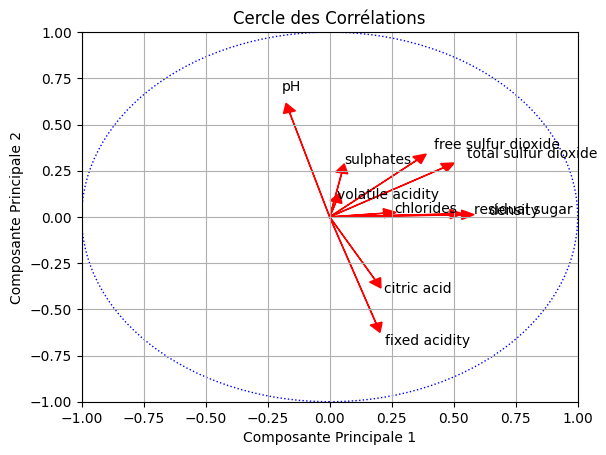

In [83]:
# Obtenir les composantes principales et les vecteurs propres (loadings)
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Créer un cercle des corrélations
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='dotted')
ax.add_artist(circle)

for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='red', ec='red')
    #plt.text(x * 1.2, y * 1.2, f'Variable {i+1}', color='black')
    plt.text(x * 1.2, y * 1.2, X0.columns[i], color='black')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle des Corrélations')
plt.grid(True)
plt.show()